In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from Utils import Utils
combined_df = pd.read_csv("dataset_preprocessed.csv")
dict_df = util.create_dict_of_dataframes_for_each_company(combined_df)

### Model : Random Forest

Experiment 1:

Since the data is company wise, I chose to train differnt models separately with each company and average the accuracy
Accuracy obtained 54%

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

company_models = {}
accuracy = []

for company,_ in dict_df.items():
    company_data = combined_df[combined_df['Company'] == company]
    # Split into train and test
    train_data = company_data[company_data['Date'] < '2020-01-01']
    test_data = company_data[company_data['Date'] >= '2020-01-01']

    X_train = train_data[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
    y_train = train_data['Target']
    X_test = test_data[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
    y_test = test_data['Target']

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = RandomForestClassifier()
    model.fit(X_train_scaled, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy for {company}: {accuracy_score(y_test, y_pred)}')

    # Save model
    company_models[company] = model
print("Test accuracy : ", sum(accuracy)/len(accuracy))

Accuracy for Company_001: 0.7894736842105263
Accuracy for Company_002: 0.7894736842105263
Accuracy for Company_003: 0.6842105263157895
Accuracy for Company_004: 0.47368421052631576
Accuracy for Company_005: 0.5263157894736842
Accuracy for Company_006: 0.8421052631578947
Accuracy for Company_007: 0.8947368421052632
Accuracy for Company_008: 0.631578947368421
Accuracy for Company_009: 0.5789473684210527
Accuracy for Company_010: 0.631578947368421
Accuracy for Company_011: 0.2631578947368421
Accuracy for Company_012: 0.5263157894736842
Accuracy for Company_013: 0.42105263157894735
Accuracy for Company_014: 0.47368421052631576
Accuracy for Company_015: 0.5789473684210527
Accuracy for Company_016: 0.7368421052631579
Accuracy for Company_017: 0.5263157894736842
Accuracy for Company_018: 0.7368421052631579
Accuracy for Company_019: 0.631578947368421
Accuracy for Company_020: 0.631578947368421
Accuracy for Company_021: 0.3157894736842105
Accuracy for Company_022: 0.3684210526315789
Accuracy fo

Experiment 2:

Since the data is less when considering one company at a time, chose to train the model with all the data together.

The model seems to overfit as per the train data confusion matrix and test data confusion matrix

The test confusion matrix is skewed.

Accuracy(56%) although remains high because data is imbalanced (the rise in share is more than the fall in shares)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Split into train and test
train_data = combined_df[combined_df['Date'] < '2020-01-01']
test_data = combined_df[combined_df['Date'] >= '2020-01-01']

X_train = train_data[['Company','Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
y_train = train_data['Target']
X_test = test_data[['Company','Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
y_test = test_data['Target']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']])
X_test_scaled = scaler.transform(X_test[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']])

# Train model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
train_precision = precision_score(y_train, y_train_pred)
print(f"Training Precision: {train_precision}")
train_recall = recall_score(y_train, y_train_pred)
print(f"Training Recall: {train_recall}")
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training F1 Score: {train_f1}")
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print(f"Training Confusion Matrix:\n {train_confusion_matrix}")

# Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
confusion_matrix_test = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {confusion_matrix_test}")

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training Confusion Matrix:
 [[6580    0]
 [   0 9260]]
Accuracy: 0.5635300372142478
Precision: 0.6134251290877797
Recall: 0.7744458930899609
F1 Score: 0.6845946984248944
Confusion Matrix:
 [[ 338 1123]
 [ 519 1782]]


Experiment 3:

Since the data is less when considering one company at a time, chose to train the model with all the data together.

In previous case, since the model was overfitting, I hypertuned the estimators hyperparametrer to 12

The model seems to overfit as per the train data confusion matrix and test data confusion matrix

The test confusion matrix is skewed.

Accuracy(53%) although remains similar because data is imbalanced (the rise in share is more than the fall in shares)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Split into train and test
train_data = combined_df[combined_df['Date'] < '2020-01-01']
test_data = combined_df[combined_df['Date'] >= '2020-01-01']

X_train = train_data[['Company','Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
y_train = train_data['Target']
X_test = test_data[['Company','Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
y_test = test_data['Target']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']])
X_test_scaled = scaler.transform(X_test[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']])

# Train model
model = RandomForestClassifier(n_estimators = 12, n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
train_precision = precision_score(y_train, y_train_pred)
print(f"Training Precision: {train_precision}")
train_recall = recall_score(y_train, y_train_pred)
print(f"Training Recall: {train_recall}")
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training F1 Score: {train_f1}")
train_classification_report = classification_report(y_train, y_train_pred)
print(f"Training Classification Report:\n {train_classification_report}")
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print(f"Training Confusion Matrix:\n {train_confusion_matrix}")

# Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification Report:\n {classification_report_test}")
confusion_matrix_test = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {confusion_matrix_test}")

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.954040404040404
Training Precision: 0.9501899535669058
Training Recall: 0.9723542116630669
Training F1 Score: 0.9611443210930828
Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      6580
           1       0.95      0.97      0.96      9260

    accuracy                           0.95     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.95      0.95      0.95     15840

Training Confusion Matrix:
 [[6108  472]
 [ 256 9004]]
Accuracy: 0.5300372142477405
Precision: 0.6096256684491979
Recall: 0.6440677966101694
F1 Score: 0.6263736263736264
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.35      0.37      1461
           1       0.61      0.64      0.63      2301

    accuracy                           0.53      3762
   macro avg       0.50      0.50      0.50      3762
weighted avg       0.52 

Experiment 4:

Since the data is less when considering one company at a time, chose to train the model with all the data together.

In previous case, since the model was overfitting, I hypertuned the estimators hyperparametrer to 6

The model gives better results than all the above cases.

Accuracy(50%) although remains similar but the test confusion matrix is not skewed.

Training Accuracy: 0.9558712121212121
Training Precision: 0.9829628793862123
Training Recall: 0.9408207343412527
Training F1 Score: 0.9614302267836451
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6580
           1       0.98      0.94      0.96      9260

    accuracy                           0.96     15840
   macro avg       0.95      0.96      0.95     15840
weighted avg       0.96      0.96      0.96     15840

Training Confusion Matrix:
 [[6429  151]
 [ 548 8712]]
Accuracy: 0.5037214247740563
Precision: 0.6148148148148148
Recall: 0.5049978270317254
F1 Score: 0.5545215938916727
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.50      0.44      1461
           1       0.61      0.50      0.55      2301

    accuracy                           0.50      3762
   macro avg       0.50      0.50      0.50      3762
weighted avg       0.53

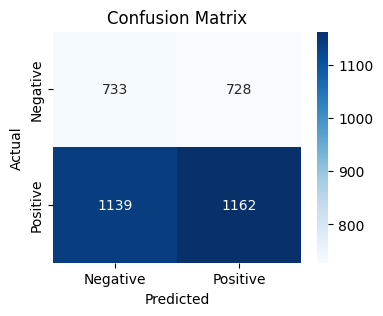

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Split into train and test
train_data = combined_df[combined_df['Date'] < '2020-01-01']
test_data = combined_df[combined_df['Date'] >= '2020-01-01']

X_train = train_data[['Company','Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
y_train = train_data['Target']
X_test = test_data[['Company','Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']]
y_test = test_data['Target']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']])
X_test_scaled = scaler.transform(X_test[['Price','Revenue','Free cash flow','Total Debt','ROE','EPS','PE ratio']])

# Train model
model = RandomForestClassifier(n_estimators = 6)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
train_precision = precision_score(y_train, y_train_pred)
print(f"Training Precision: {train_precision}")
train_recall = recall_score(y_train, y_train_pred)
print(f"Training Recall: {train_recall}")
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training F1 Score: {train_f1}")
train_classification_report = classification_report(y_train, y_train_pred)
print(f"Training Classification Report:\n {train_classification_report}")
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print(f"Training Confusion Matrix:\n {train_confusion_matrix}")

# Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification Report:\n {classification_report_test}")
confusion_matrix_test = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {confusion_matrix_test}")

# Plot confusion matrix
# Test data : stock rises-2188, stock drops-1378
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()